In [1]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
np.set_printoptions(precision=4)
sns.set()
import math
from random import Random
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm
# make a random integer generator
# random = Random()
random1 = Random().randint(0, 100)

In [2]:
dp = pd.read_csv('C:\\Users\\MY PC\\OneDrive\\Desktop\\ML_Assignement\\ML_assign2\\ML_assign2\\Dsata_Set_for_Assignment 1.csv')
dp.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
dp.drop(['id'] , axis=1 , inplace=True)

In [4]:
dp.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
Y = dp['diagnosis']
X = dp.drop(['diagnosis'] , axis=1)
Y = Y.replace({'M':1 , 'B':0})
Y.head()
# x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size=0.33, random_state=random1,shuffle=True)

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [6]:
# replace the missing values with the mean of the column
X = X.replace('?',np.nan)
X = X.apply(lambda x: x.fillna(x.mean()),axis=0)
# print(X.isnull().sum())

In [7]:
# normalise the data
X = (X - X.mean()) / X.std()
x_train=X.iloc[:, 2:].values
x_test=X.iloc[:, 2:].values
y_train=Y.iloc[:, 1].values
y_test=Y.iloc[:, 1].values

In [9]:

class_feature_mean1 = x_train[y_train == 1].mean()
class_feature_mean0 = x_train[y_train == 0].mean()
class_feature_mean1
class_feature_mean0

radius_mean               -0.583080
texture_mean              -0.305268
perimeter_mean            -0.589274
area_mean                 -0.563543
smoothness_mean           -0.250856
compactness_mean          -0.435080
concavity_mean            -0.527165
concave points_mean       -0.600071
symmetry_mean             -0.218466
fractal_dimension_mean     0.035537
radius_se                 -0.440980
texture_se                 0.030671
perimeter_se              -0.424612
area_se                   -0.425448
smoothness_se              0.057053
compactness_se            -0.171465
concavity_se              -0.168225
concave points_se         -0.299314
symmetry_se                0.070544
fractal_dimension_se      -0.041581
radius_worst              -0.614285
texture_worst             -0.329997
perimeter_worst           -0.615885
area_worst                -0.576561
smoothness_worst          -0.307496
compactness_worst         -0.426882
concavity_worst           -0.485021
concave points_worst      -0

In [10]:
Sw = np.zeros((30,30))
A = np.dot((x_train[y_train == 1] - class_feature_mean1).T , (x_train[y_train == 1] - class_feature_mean1))
B = np.dot((x_train[y_train == 0] - class_feature_mean0).T , (x_train[y_train == 0] - class_feature_mean0))
Sw = A + B

In [11]:
Sw_inv = np.linalg.inv(Sw)
w = np.dot(Sw_inv , (class_feature_mean1 - class_feature_mean0))

In [12]:
wTr = w.T
x_train_proj = np.dot(x_train , wTr)
projection_mean1 = x_train_proj[y_train == 1].mean()
projection_mean0 = x_train_proj[y_train == 0].mean()


In [13]:
print(projection_mean0)
print(projection_mean1)

-0.014390333415930445
0.0238422718051642


In [14]:

projection_std1 = x_train_proj[y_train == 1].std()
projection_std0 = x_train_proj[y_train == 0].std()


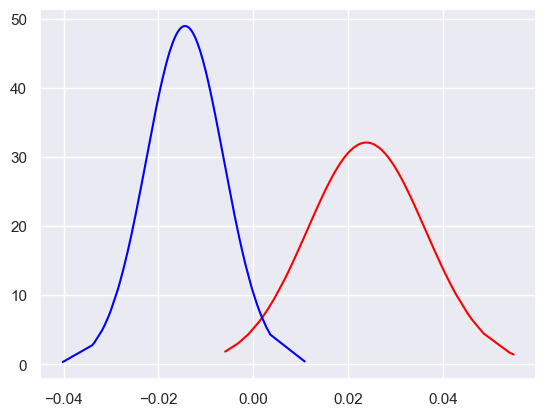

In [15]:
x = np.linspace(x_train_proj.min() , x_train_proj.max() , 1000)
alpha = np.sort(x_train_proj[y_train == 1])
beta = np.sort(x_train_proj[y_train == 0])
plt.plot(alpha, norm.pdf(alpha, projection_mean1, projection_std1), color='red')
plt.plot(beta, norm.pdf(beta, projection_mean0, projection_std0), color='blue')
# save the figure
plt.savefig(str(random1) + 'first.png')

In [16]:
def solve(mean1,mean0,std1,std0):
    a = 1/(2*std1**2) - 1/(2*std0**2)
    b = mean0/(std0**2) - mean1/(std1**2)
    c = mean1**2/(2*std1**2) - mean0**2/(2*std0**2) - math.log((std0/std1))
    return np.roots([a,b,c])
result = solve(projection_mean1,projection_mean0,projection_std1,projection_std0)
print(result)
res = []
for i in range(len(result)):
    if result[i] > x_train_proj.min() and result[i] < x_train_proj.max():
        res.append(result[i])
print(res)


[-0.0882  0.0019]
[0.0018550773690029117]


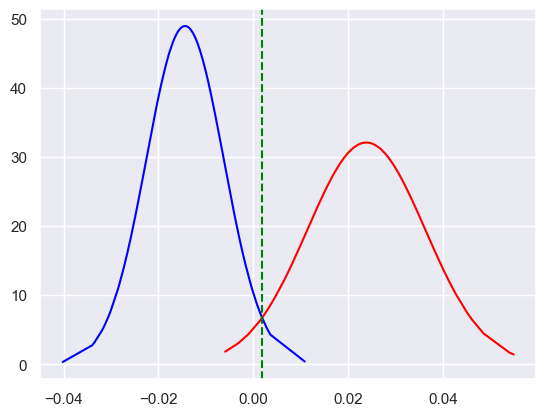

In [17]:
plt.plot(alpha, norm.pdf(alpha, projection_mean1, projection_std1), color='red')
plt.plot(beta, norm.pdf(beta, projection_mean0, projection_std0), color='blue')
plt.axvline(x=res[0], color='green', linestyle='--')
plt.plot(res, norm.pdf(res, projection_mean1, projection_std1), color='green')
# save the figure
plt.savefig(str(random1) + 'firstWithLine.png')

In [18]:
def predict(x_test):
    x_res = []
    for i in range(len(x_test)):
        x_res.append(np.dot(x_test.iloc[i] , wTr))
    
    y_pred = []
    for i in range(len(x_res)):
        if x_res[i] > res[0]:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return y_pred
# accuracy
def accuracy(x_test , y_test):
    y_pred = predict(x_test)
    return np.sum(y_pred == y_test)/len(y_test)


In [19]:
# calculate the precision and recall
# write the results in a file
f = open(str(random1) + 'result1.txt', 'w')
y_pred = predict(x_test)

def precision_recall(y_test):
    prec = []
    y_test = list(y_test)
    for i in range(len(y_pred)):
        if y_pred[i] == 1 and y_test[i] == 1:
            prec.append(1)
        elif y_test[i] == 1 and y_pred[i] == 0:
            prec.append(0)
    f.write('precision = ' + str(np.sum(prec)/len(prec)) + '\n')
    print('precision = ' , np.sum(prec)/len(prec))

    rec = []
    for i in range(len(y_pred)):
        if y_pred[i] == 1 and y_test[i] == 1:
            rec.append(1)
        elif y_pred[i] == 1 and y_test[i] == 0:
            rec.append(0)
    print(f'recall = ' , np.sum(rec)/len(rec))
    f.write('recall = ' + str(np.sum(rec)/len(rec)) + '\n')
    alpha = np.sum(prec)/len(prec)
    beta = np.sum(rec)/len(rec)
    f.write('f1 score = ' + str(2*alpha*beta/(alpha+beta)) + '\n')
    print('f1 score = ' , 2*alpha*beta/(alpha+beta))
    

precision_recall(y_test)
f.write('accuracy = ' + str(accuracy(x_test , y_test)) + '\n')
print('accuracy = ' ,accuracy(x_test , y_test))

        
    
    

precision =  0.9545454545454546
recall =  0.984375
f1 score =  0.9692307692307692
accuracy =  0.9787234042553191


Learning Task 2

In [20]:
# x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size=0.33, random_state=random1,shuffle=True) 
# shuffle the columns fo x_train and x_test keeping the same order
x_train = x_train.reindex(sorted(x_train.columns), axis=1)
x_test = x_test.reindex(sorted(x_test.columns), axis=1)


In [21]:
class_feature_mean1 = x_train[y_train == 1].mean()
class_feature_mean0 = x_train[y_train == 0].mean()
class_feature_mean1
class_feature_mean0

area_mean                 -0.563543
area_se                   -0.425448
area_worst                -0.576561
compactness_mean          -0.435080
compactness_se            -0.171465
compactness_worst         -0.426882
concave points_mean       -0.600071
concave points_se         -0.299314
concave points_worst      -0.606660
concavity_mean            -0.527165
concavity_se              -0.168225
concavity_worst           -0.485021
fractal_dimension_mean     0.035537
fractal_dimension_se      -0.041581
fractal_dimension_worst   -0.210972
perimeter_mean            -0.589274
perimeter_se              -0.424612
perimeter_worst           -0.615885
radius_mean               -0.583080
radius_se                 -0.440980
radius_worst              -0.614285
smoothness_mean           -0.250856
smoothness_se              0.057053
smoothness_worst          -0.307496
symmetry_mean             -0.218466
symmetry_se                0.070544
symmetry_worst            -0.279393
texture_mean              -0

In [22]:
Sw = np.zeros((30,30))
A = np.dot((x_train[y_train == 1] - class_feature_mean1).T , (x_train[y_train == 1] - class_feature_mean1))
B = np.dot((x_train[y_train == 0] - class_feature_mean0).T , (x_train[y_train == 0] - class_feature_mean0))
Sw = A + B

In [23]:
Sw_inv = np.linalg.inv(Sw)
w = np.dot(Sw_inv , (class_feature_mean1 - class_feature_mean0))

In [24]:
wTr = w.T
x_train_proj = np.dot(x_train , wTr)
projection_mean1 = x_train_proj[y_train == 1].mean()
projection_mean0 = x_train_proj[y_train == 0].mean()


In [25]:
print(projection_mean0)
print(projection_mean1)

-0.01439033341593114
0.023842271805165415


In [26]:

projection_std1 = x_train_proj[y_train == 1].std()
projection_std0 = x_train_proj[y_train == 0].std()


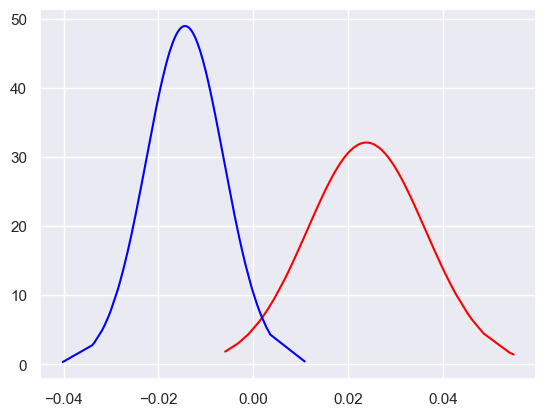

In [27]:
x = np.linspace(x_train_proj.min() , x_train_proj.max() , 1000)
alpha = np.sort(x_train_proj[y_train == 1])
beta = np.sort(x_train_proj[y_train == 0])
plt.plot(alpha, norm.pdf(alpha, projection_mean1, projection_std1), color='red')
plt.plot(beta, norm.pdf(beta, projection_mean0, projection_std0), color='blue')
# save the figure with the random number
plt.savefig(str(random1) + 'second.png')

In [28]:
def solve(mean1,mean0,std1,std0):
    a = 1/(2*std1**2) - 1/(2*std0**2)
    b = mean0/(std0**2) - mean1/(std1**2)
    c = mean1**2/(2*std1**2) - mean0**2/(2*std0**2) - math.log((std0/std1))
    return np.roots([a,b,c])
result = solve(projection_mean1,projection_mean0,projection_std1,projection_std0)
print(result)
res = []
for i in range(len(result)):
    if result[i] > x_train_proj.min() and result[i] < x_train_proj.max():
        res.append(result[i])
print(res)


[-0.0882  0.0019]
[0.0018550773690027542]


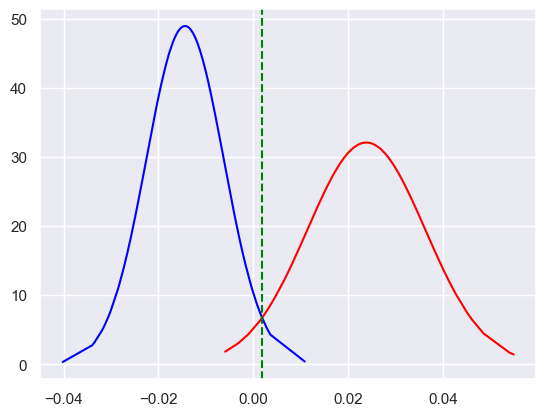

In [29]:
plt.plot(alpha, norm.pdf(alpha, projection_mean1, projection_std1), color='red')
plt.plot(beta, norm.pdf(beta, projection_mean0, projection_std0), color='blue')
plt.axvline(x=res[0], color='green', linestyle='--')
plt.plot(res, norm.pdf(res, projection_mean1, projection_std1), color='green')
# save the figure with the random number
plt.savefig(str(random1) + 'secondWithLine.png')

In [30]:
def predict(x_test):
    x_res = []
    for i in range(len(x_test)):
        x_res.append(np.dot(x_test.iloc[i] , wTr))
    
    y_pred = []
    for i in range(len(x_res)):
        if x_res[i] > res[0]:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return y_pred
# accuracy
def accuracy(x_test , y_test):
    y_pred = predict(x_test)
    return np.sum(y_pred == y_test)/len(y_test)


In [31]:
# calculate the precision and recall
# write the results to the file
f = open(str(random1) + 'result2.txt', 'w')
y_pred = predict(x_test)

def precision_recall(y_test):
    prec = []
    y_test = list(y_test)
    for i in range(len(y_pred)):
        if y_pred[i] == 1 and y_test[i] == 1:
            prec.append(1)
        elif y_test[i] == 1 and y_pred[i] == 0:
            prec.append(0)
    f.write('precision = ' + str(np.sum(prec)/len(prec)) + '\n')
    print('precision = ' , np.sum(prec)/len(prec))

    rec = []
    for i in range(len(y_pred)):
        if y_pred[i] == 1 and y_test[i] == 1:
            rec.append(1)
        elif y_pred[i] == 1 and y_test[i] == 0:
            rec.append(0)
    print(f'recall = ' , np.sum(rec)/len(rec))
    f.write('recall = ' + str(np.sum(rec)/len(rec)) + '\n')
    alpha = np.sum(prec)/len(prec)
    beta = np.sum(rec)/len(rec)
    print('f1 score = ' , 2*alpha*beta/(alpha+beta))
    f.write('f1 score = ' + str(2*alpha*beta/(alpha+beta)) + '\n')
    

precision_recall(y_test)
print('accuracy = ' ,accuracy(x_test , y_test))
f.write('accuracy = ' + str(accuracy(x_test , y_test)) + '\n')
f.close()

        
    
    

precision =  0.9545454545454546
recall =  0.984375
f1 score =  0.9692307692307692
accuracy =  0.9787234042553191
